# WT T2 v Control T2
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import decoupler as dc
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
from anndata import AnnData
from scipy.stats import pearsonr, spearmanr

## Load Data

In [2]:
# Set datasplit value for whole notebook
datasplit="WT_2"
# Read raw data and process it
adata = pd.read_csv('../data/MAFA_WT_gene_count.txt', index_col=20, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAWT_001,769950,469036,398234,164748,186078,116719,151341,178909,133640,121061,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_002,760265,204988,207026,146662,80616,98010,70795,109150,55131,49581,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_003,672585,522418,378290,146501,243656,93180,195788,131732,163870,158054,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_004,820162,262856,502891,171062,117809,132909,97752,150350,79653,75222,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_005,878886,335731,73413,123677,122960,127821,102340,30019,96654,85530,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_006,878745,350758,114376,147449,134333,125976,105483,31916,99623,94874,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_007,1129979,359712,159369,65313,156749,104854,156351,25998,108889,113709,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_008,1017468,285966,157747,109003,111200,119484,89777,32111,89609,81167,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_009,800671,176313,194431,139982,64275,101077,52585,53031,49169,39752,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_010,633710,177343,219577,113536,73264,76057,64194,57478,50504,46106,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 20 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAWT_001,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_002,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_003,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_004,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_005,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_006,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_007,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_008,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_009,MAFAWT,MAFA,WT,T1,1,Y,MAFA_WT_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAWT_001,MAFA,T0,N
MAFAWT_002,MAFA,T0,N
MAFAWT_003,MAFA,T0,N
MAFAWT_004,MAFA,T0,N
MAFAWT_005,MAFA,T2,Y
MAFAWT_006,MAFA,T2,Y
MAFAWT_007,MAFA,T2,Y
MAFAWT_008,MAFA,T2,Y
MAFAWT_009,MAFA,T1,Y
MAFAWT_010,MAFA,T1,Y


In [6]:
#TODO change this to correct time point and selection
# split data set by timepoint
adata = adata[adata.obs.time_point == 'T2']

## Quality Control

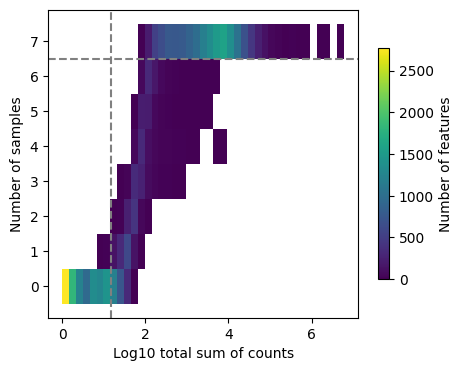

In [7]:
dc.plot_filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1,save=f'../figures/{datasplit}/QC.png')

In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15137

In [9]:
# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 7 × 15137
    obs: 'condition', 'time_point', 'DOX'

In [10]:
# Import DESeq2
#!pip install pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [11]:
adata.X = np.round(adata.X,0)

In [12]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

In [13]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.15 seconds.

Fitting dispersion trend curve...
... done in 4.39 seconds.

Fitting MAP dispersions...
... done in 20.66 seconds.

Fitting LFCs...
... done in 1.69 seconds.

Refitting 0 outliers.



In [14]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=['condition', 'MAFA', 'Control'], n_cpus=8)

In [15]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 1.01 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,856324.687500,0.237853,0.128584,1.849788,6.434410e-02,1.293892e-01
MT-CO1,303544.937500,0.111150,0.242217,0.458886,6.463158e-01,7.585791e-01
GCG,215986.015625,-1.557492,0.252290,-6.173408,6.683327e-10,6.347661e-09
INS,110437.734375,-0.197277,0.248085,-0.795198,4.264982e-01,5.692159e-01
MT-ND4,125599.765625,-0.048851,0.226161,-0.216001,8.289874e-01,8.934458e-01
...,...,...,...,...,...,...
CNTD2,13.673280,-0.146963,0.485983,-0.302403,7.623449e-01,8.471370e-01
AL354751.1,15.011662,0.199704,0.520653,0.383564,7.013013e-01,8.011847e-01
ZNF451-AS1,13.238357,0.438054,0.470248,0.931539,3.515750e-01,4.952019e-01


In [16]:
# Shrink LFCs
# stat_res.lfc_shrink(coeff='condition_MAFA_vs_Control')

In [17]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,856324.687500,0.237853,0.128584,1.849788,6.434410e-02,1.293892e-01
MT-CO1,303544.937500,0.111150,0.242217,0.458886,6.463158e-01,7.585791e-01
GCG,215986.015625,-1.557492,0.252290,-6.173408,6.683327e-10,6.347661e-09
INS,110437.734375,-0.197277,0.248085,-0.795198,4.264982e-01,5.692159e-01
MT-ND4,125599.765625,-0.048851,0.226161,-0.216001,8.289874e-01,8.934458e-01
...,...,...,...,...,...,...
CNTD2,13.673280,-0.146963,0.485983,-0.302403,7.623449e-01,8.471370e-01
AL354751.1,15.011662,0.199704,0.520653,0.383564,7.013013e-01,8.011847e-01
ZNF451-AS1,13.238357,0.438054,0.470248,0.931539,3.515750e-01,4.952019e-01


In [18]:
#!pip install adjustText

# check SE on L2FC

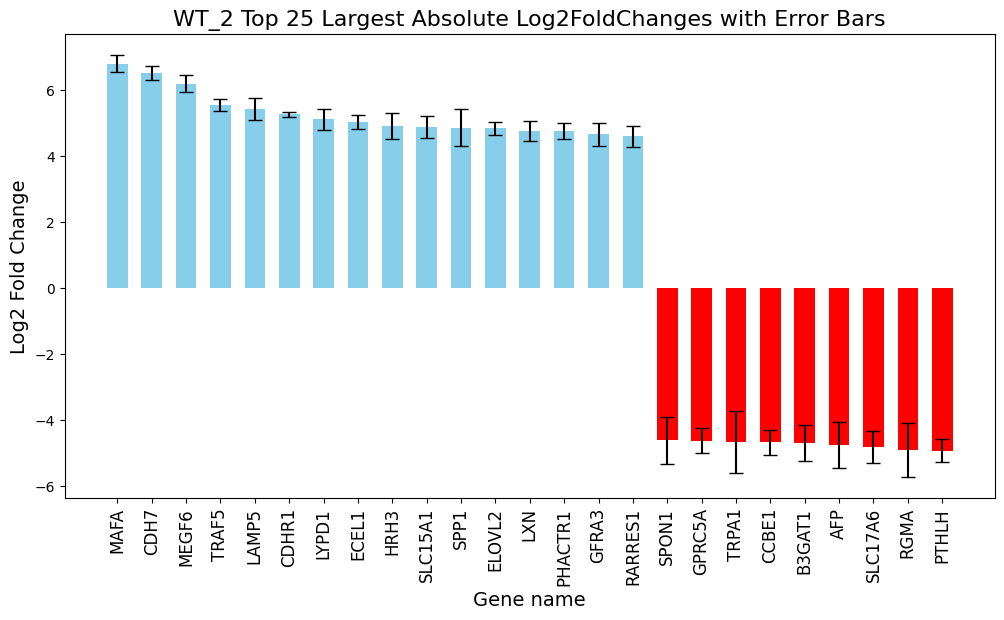

In [19]:
top_25_l2fc = results_df.sort_values('log2FoldChange', key=abs, ascending=False).head(25)
top_25_l2fc = top_25_l2fc.sort_values('log2FoldChange', ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(top_25_l2fc))
bar_width = 0.6

positive_lfc = top_25_l2fc[top_25_l2fc['log2FoldChange'] >= 0]
negative_lfc = top_25_l2fc[top_25_l2fc['log2FoldChange'] < 0]
ax.bar(positive_lfc.index, positive_lfc['log2FoldChange'], yerr=positive_lfc['lfcSE'], capsize=5, color='skyblue', width=bar_width)
ax.bar(negative_lfc.index, negative_lfc['log2FoldChange'], yerr=negative_lfc['lfcSE'], capsize=5, color='red', width=bar_width)

ax.set_xlabel('Gene name', fontsize=14)
ax.set_ylabel('Log2 Fold Change', fontsize=14)
ax.set_title(f'{datasplit} Top 25 Largest Absolute Log2FoldChanges with Error Bars', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(top_25_l2fc.index, rotation=90, fontsize=12)
plt.subplots_adjust(bottom=0.3)
plt.savefig(f'../figures/{datasplit}/lfcse.png')
plt.show()

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


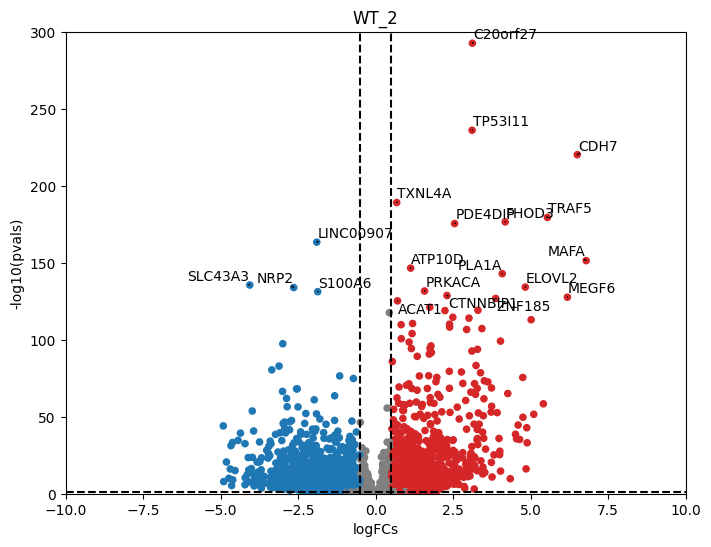

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    ax=ax
)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 300)
plt.title(f'{datasplit}')
plt.savefig(f'../figures/{datasplit}/volcano.png')

In [21]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,LINC01135,AL022069.1,SLC4A5,AC010894.2,SUGT1P1,CNTD2,AL354751.1,ZNF451-AS1,AC090229.1,C1S
treatment.vs.control,1.849788,0.458886,-6.173408,-0.795198,-0.216001,2.540171,0.253253,-13.026464,-0.292886,0.135811,...,2.51773,-0.238043,0.71009,1.021908,-0.075381,-0.302403,0.383564,0.931539,1.746151,1.857942


### Transcription factor activity inference

In [22]:
#collectri = dc.get_collectri(organism='human')
collectri = pd.read_csv("collectri.csv")
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


### Activity inference with Univariate Linear Model (ULM)

In [23]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
#make copy to make table from
table_tf_acts = tf_acts
table_tf_pvals = tf_pvals
table_tf_acts = table_tf_acts.rename(index={"treatment.vs.control": "TF_Activity"})
table_tf_pvals = table_tf_pvals.rename(index={"treatment.vs.control": "TF_pvalue"})
new_table = pd.concat([table_tf_acts, table_tf_pvals], axis = 0).T
#actual df
tf_acts

Running ulm on mat with 1 samples and 15137 targets for 625 sources.


,ABL1,AHR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,ARID4A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-2.181629,-3.405461,-2.060783,-1.096972,-0.317325,-0.426508,-1.402126,-2.869691,1.038427,-0.339472,...,0.535308,-0.038742,0.091836,-1.430168,-0.782632,-0.075153,-1.454037,1.048064,-0.868531,-2.15461


# Filter new Table by the LFC and adjpvalue from DE table above

In [24]:
#Not all TF are in the list?
selected_rows = results_df.loc[[idx for idx in new_table.index if idx in results_df.index]]
selected_rows

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ABL1,3505.162109,-0.481153,0.104636,-4.598357,4.258361e-06,2.348071e-05
AHR,1535.845825,-1.401087,0.165043,-8.489211,2.080443e-17,4.170805e-16
APEX1,2973.605957,0.107501,0.131435,0.817901,4.134135e-01,5.559192e-01
AR,62.240688,-0.827279,0.216074,-3.828691,1.288265e-04,5.410427e-04
ARID1A,3114.738037,-0.061359,0.189578,-0.323662,7.461940e-01,8.355076e-01
...,...,...,...,...,...,...
ZNF395,468.322327,-1.076230,0.161915,-6.646878,2.993750e-11,3.283579e-10
ZNF436,361.950592,0.191075,0.189885,1.006270,3.142855e-01,4.552825e-01
ZNF699,97.593674,-0.210110,0.214697,-0.978634,3.277606e-01,4.690382e-01


In [25]:
# make selectable for various threshold values
Threshold_LFC = 0.5
Threshold_padj = 0.05
subset_lfc = selected_rows[abs(selected_rows["log2FoldChange"]) > Threshold_LFC]
subset_padj = subset_lfc[abs(subset_lfc["padj"]) < Threshold_padj]
subset_padj

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
AHR,1535.845825,-1.401087,0.165043,-8.489211,2.080443e-17,4.170805e-16
AR,62.240688,-0.827279,0.216074,-3.828691,1.288265e-04,5.410427e-04
ASCL1,339.155823,-2.497086,0.641721,-3.891234,9.973556e-05,4.281331e-04
ASCL2,3262.758057,0.863656,0.156682,5.512173,3.544293e-08,2.687696e-07
ATF3,167.512955,-0.755458,0.239386,-3.155816,1.600499e-03,5.328894e-03
...,...,...,...,...,...,...
ZFHX3,1254.628906,0.922840,0.333394,2.768016,5.639867e-03,1.619830e-02
ZFP42,189.733856,-2.756096,0.795863,-3.463029,5.341312e-04,1.980066e-03
ZHX2,139.281311,-0.906574,0.184451,-4.914986,8.878898e-07,5.478638e-06


In [26]:
#get TF data too
tf_data = new_table.loc[subset_padj.index]
#merge into 1 for readability
complete_table = pd.merge(tf_data, subset_padj, left_index=True, right_index=True)
#save
complete_table.to_csv(f'../figures/{datasplit}/filtered_table_comparison_{datasplit}.csv')


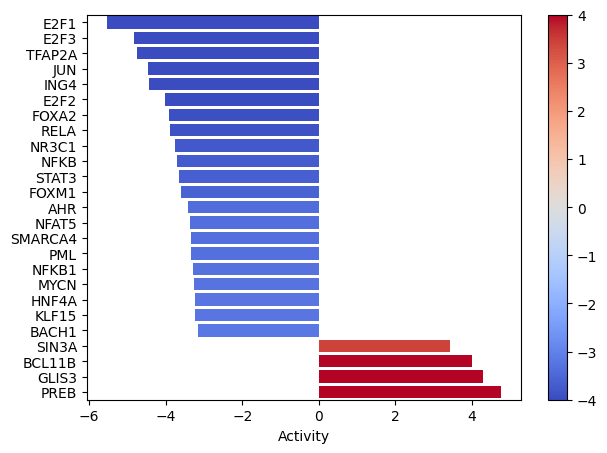

In [27]:
dc.plot_barplot(
    tf_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save=f'../figures/{datasplit}/tf_activities.png'
)

In [28]:
abs_values = tf_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = tf_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='TFs', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv(f'../figures/{datasplit}/top25_tfs.csv')
long_df

,TFs,value
1,E2F1,-5.545122
2,E2F3,-4.833668
3,PREB,4.762955
4,TFAP2A,-4.757307
5,JUN,-4.475013
6,ING4,-4.428384
7,GLIS3,4.284585
8,E2F2,-4.029434
9,BCL11B,4.009577
10,FOXA2,-3.922148


# TF Activity with MLM

In [29]:
tf_acts_MLM, tf_pvals_MLM, = dc.run_mlm(mat=mat, net=collectri, verbose=True)
tf_acts_MLM

Running mlm on mat with 1 samples and 15137 targets for 625 sources.


,ABL1,AHR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,ARID4A,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,0.31379,-2.503244,-0.927817,1.732444,0.225213,0.779476,0.652663,-0.609113,2.187043,-0.802178,...,1.315129,1.574286,0.996522,-2.205676,-1.110524,0.825758,0.649797,0.877107,-1.253528,-0.986818


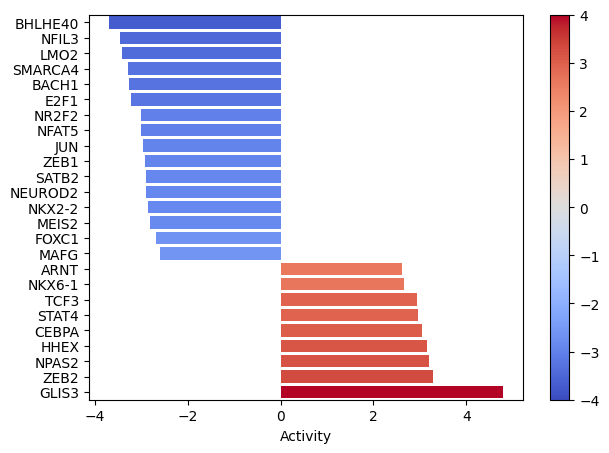

In [30]:
dc.plot_barplot(
    tf_acts_MLM,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save=f'../figures/{datasplit}/{datasplit}_tf_activities_MLM.png'
)

# Compare ULM and MLM results correlations

In [31]:
pearson_r, pearson_p = pearsonr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())
spearman_r, spearman_p = spearmanr(tf_acts.values.flatten(), tf_acts_MLM.values.flatten())

print(f"Pearson correlation: {pearson_r:.2f} (p-value: {pearson_p:.2e})")
print(f"Spearman correlation: {spearman_r:.2f} (p-value: {spearman_p:.2e})")

Pearson correlation: 0.66 (p-value: 6.48e-79)
Spearman correlation: 0.64 (p-value: 2.25e-74)


# Find overlap in (Top 25)

In [32]:
ulm_top_25 = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
mlm_top_25 = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(25).index
len(set(ulm_top_25)&set(mlm_top_25)) / float(len(set(ulm_top_25) | set(mlm_top_25))) * 100

31.57894736842105

# Find overlap in top 10% (Top 65)

In [33]:
ulm_top = tf_acts.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts.T) * 0.1)).index
mlm_top = tf_acts_MLM.T.sort_values(by='treatment.vs.control', ascending=False).head(int(len(tf_acts_MLM.T) * 0.1)).index
#len(set(ulm_top)&set(mlm_top)) #length of overlap of both
#float(len(set(ulm_top))) #lengh of first list
# set(mlm_top))) * 100 scale to %
len(set(ulm_top)&set(mlm_top)) / float(len(set(ulm_top) | set(mlm_top))) * 100

27.835051546391753

# Filter data

In [34]:
#filter TF_pvalue = 0.05
#filter based on TF_Activity and log2foldchange must have the same sign
filtered = complete_table
translate = pd.read_csv('../data/mart_export.txt', sep='\t')
filtered_df = filtered[filtered['TF_pvalue'] < 0.05]
#print(filtered_df)
print(len(filtered_df))
same_sign_df = filtered_df[(np.sign(filtered_df['TF_Activity']) == np.sign(filtered_df['log2FoldChange']))]
print(len(same_sign_df))
#print(same_sign_df)
#add on the ensembl ids
merged_df = same_sign_df.reset_index().merge(translate[['Gene name', 'Gene stable ID']], how='left', left_on='gene_name', right_on='Gene name')
merged_df = merged_df.set_index('Gene stable ID')
merged_df = merged_df.drop('gene_name', axis=1)
merged_df.to_csv(f'../figures/{datasplit}/fully_filtered_{datasplit}.csv')
merged_df

35
28


,TF_Activity,TF_pvalue,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene name
Gene stable ID,,,,,,,,,
ENSG00000106546,-3.405461,6.622410e-04,1535.845825,-1.401087,0.165043,-8.489211,2.080443e-17,4.170805e-16,AHR
ENSG00000134107,-2.073140,3.817612e-02,175.603928,-1.649524,0.276086,-5.974667,2.305600e-09,2.037219e-08,BHLHE40
ENSG00000012048,-2.311504,2.081839e-02,135.380417,-1.604986,0.214193,-7.493173,6.722803e-14,9.756121e-13,BRCA1
ENSG00000101412,-5.545122,2.986661e-08,292.843353,-1.360019,0.181486,-7.493793,6.691137e-14,9.719487e-13,E2F1
ENSG00000282899,-4.029434,5.618469e-05,111.869240,-2.153469,0.609520,-3.533056,4.107858e-04,1.563010e-03,E2F2
ENSG00000007968,-4.029434,5.618469e-05,111.869240,-2.153469,0.609520,-3.533056,4.107858e-04,1.563010e-03,E2F2
ENSG00000111206,-3.593285,3.275719e-04,231.348389,-1.537921,0.354949,-4.332787,1.472332e-05,7.359718e-05,FOXM1
ENSG00000150907,-2.468478,1.357985e-02,965.643250,-1.014158,0.157189,-6.451853,1.104910e-10,1.145474e-09,FOXO1
ENSG00000285109,-2.126332,3.349180e-02,718.564880,-0.513583,0.126235,-4.068472,4.732236e-05,2.166580e-04,GATA4


In [35]:
from collections import defaultdict
#-------------------------------------------------------------------------------
#1. plot targets of interesting genes?
#2. get all possible targets from collecri
#3. get targets as list
#4. filter by positive/negative
#5. make list for filtered targets and their expression
#6. save
#-------------------------------------------------------------------------------
#data = pd.read_csv(f'../figures/direct/compare/fully_filtered/{datasplit}.csv')
data = merged_df
#-------------------------------------------------------------------------------
#fill with NaN
def fill_na(targets_dict):
    max_len = max(len(lst) for lst in targets_dict.values())
    padded_dict = defaultdict(list)
    for key, lst in targets_dict.items():
        padded_lst = lst + [np.nan] * (max_len - len(lst))
        padded_dict[key] = padded_lst
    return padded_dict
#-------------------------------------------------------------------------------

targets_dict_positive={}
targets_dict_negative={}
all_positive = []
all_negative = []

plt.ioff()
for index, row in data.iterrows():
    TF_name  = row['Gene name']
    targets_dict_positive[TF_name]=[]
    targets_dict_negative[TF_name]=[]
    dc.plot_targets(results_df, stat='stat', source_name=TF_name, net=collectri, top=25, save=f'../figures/{datasplit}/targets/{TF_name}_targets.png')
    plt.close()
    
    target_list = collectri['target'].loc[collectri['source'] == TF_name]
    #filter targte_list by results_df
    matching_elements = [element for element in target_list if element in results_df.index]

    #for each target check if its positively or negativly expressed and split (LFC +/-)
    # dict{TF: dict{target: expression} }
    for target in matching_elements:
        lfc = results_df.loc[target, 'log2FoldChange']
        
        if lfc > 0:
            all_positive.append(target)
            targets_dict_positive[TF_name].append(target)
            #targets_dict_positive[TF_name].append({target, lfc})
        else:
            all_negative.append(target)
            targets_dict_negative[TF_name].append(target)
            #targets_dict_negative[TF_name].append({target, lfc})

# for i in all_positive:
#     print(i)
#TODO maybe just make 2 lists instead of dfs
with open(f"../figures/fully_filtered_{datasplit}_positive_targets_list.txt", 'w') as file:
    for item in all_positive:
        file.write(item + '\n')
with open(f"../figures/fully_filtered_{datasplit}_negative_targets_list.txt", 'w') as file:
    for item in all_negative:
        file.write(item + '\n')

# # Create a DataFrame from the dictionary
# targets_df_positive = pd.DataFrame(fill_na(targets_dict_positive))
# targets_df_negative = pd.DataFrame(fill_na(targets_dict_negative))
# #print(targets_df_positive.to_string())

# #save as .csvs
# targets_df_positive.to_csv(f"../figures/direct/compare/fully_filtered/{datasplit}_positive_targets_list.csv")
# targets_df_negative.to_csv(f"../figures/direct/compare/fully_filtered/{datasplit}_negative_targets_list.csv")

plt.ion()

# Plot Networks

In [36]:
# ULM Network
#undo naming to match mat again
# dc.plot_network(
#     net=collectri,
#     obs=mat,
#     act=tf_acts,
#     #n_sources=['SIX1', 'BCL11B', 'EN1', 'CREB5', 'ZNF384', 'TFAP2A', 'NR3C1', 'JUN', 'MAFA'],
#     n_sources=["PDX1", "MAFA"],
#     n_targets=25,
#     node_size=0.5,
#     label_size=8,
#     figsize=(10, 10),
#     c_pos_w='darkgreen',
#     c_neg_w='darkred',
#     vcenter=True,
#     save = f'../figures/direct/{datasplit}/plot_networks_ulm.png'
# )

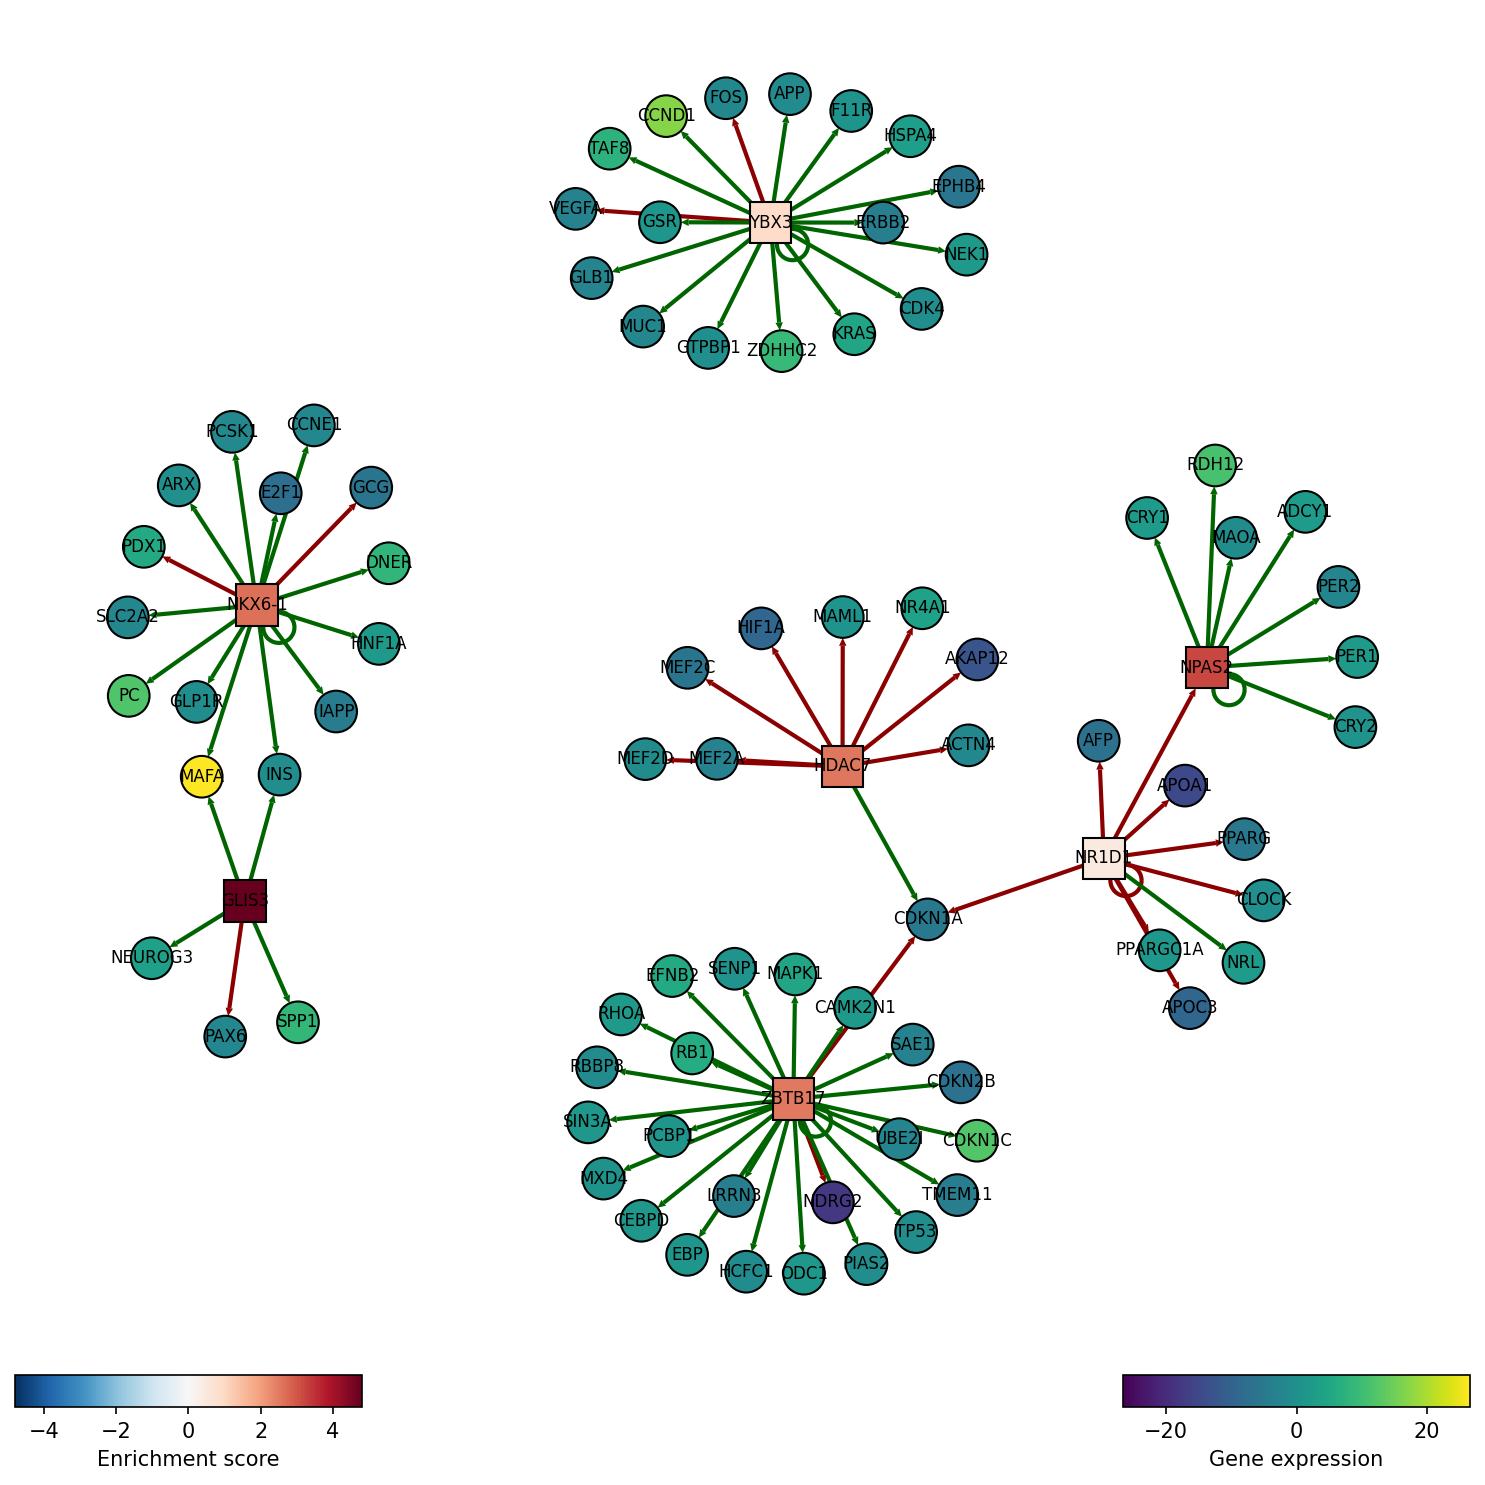

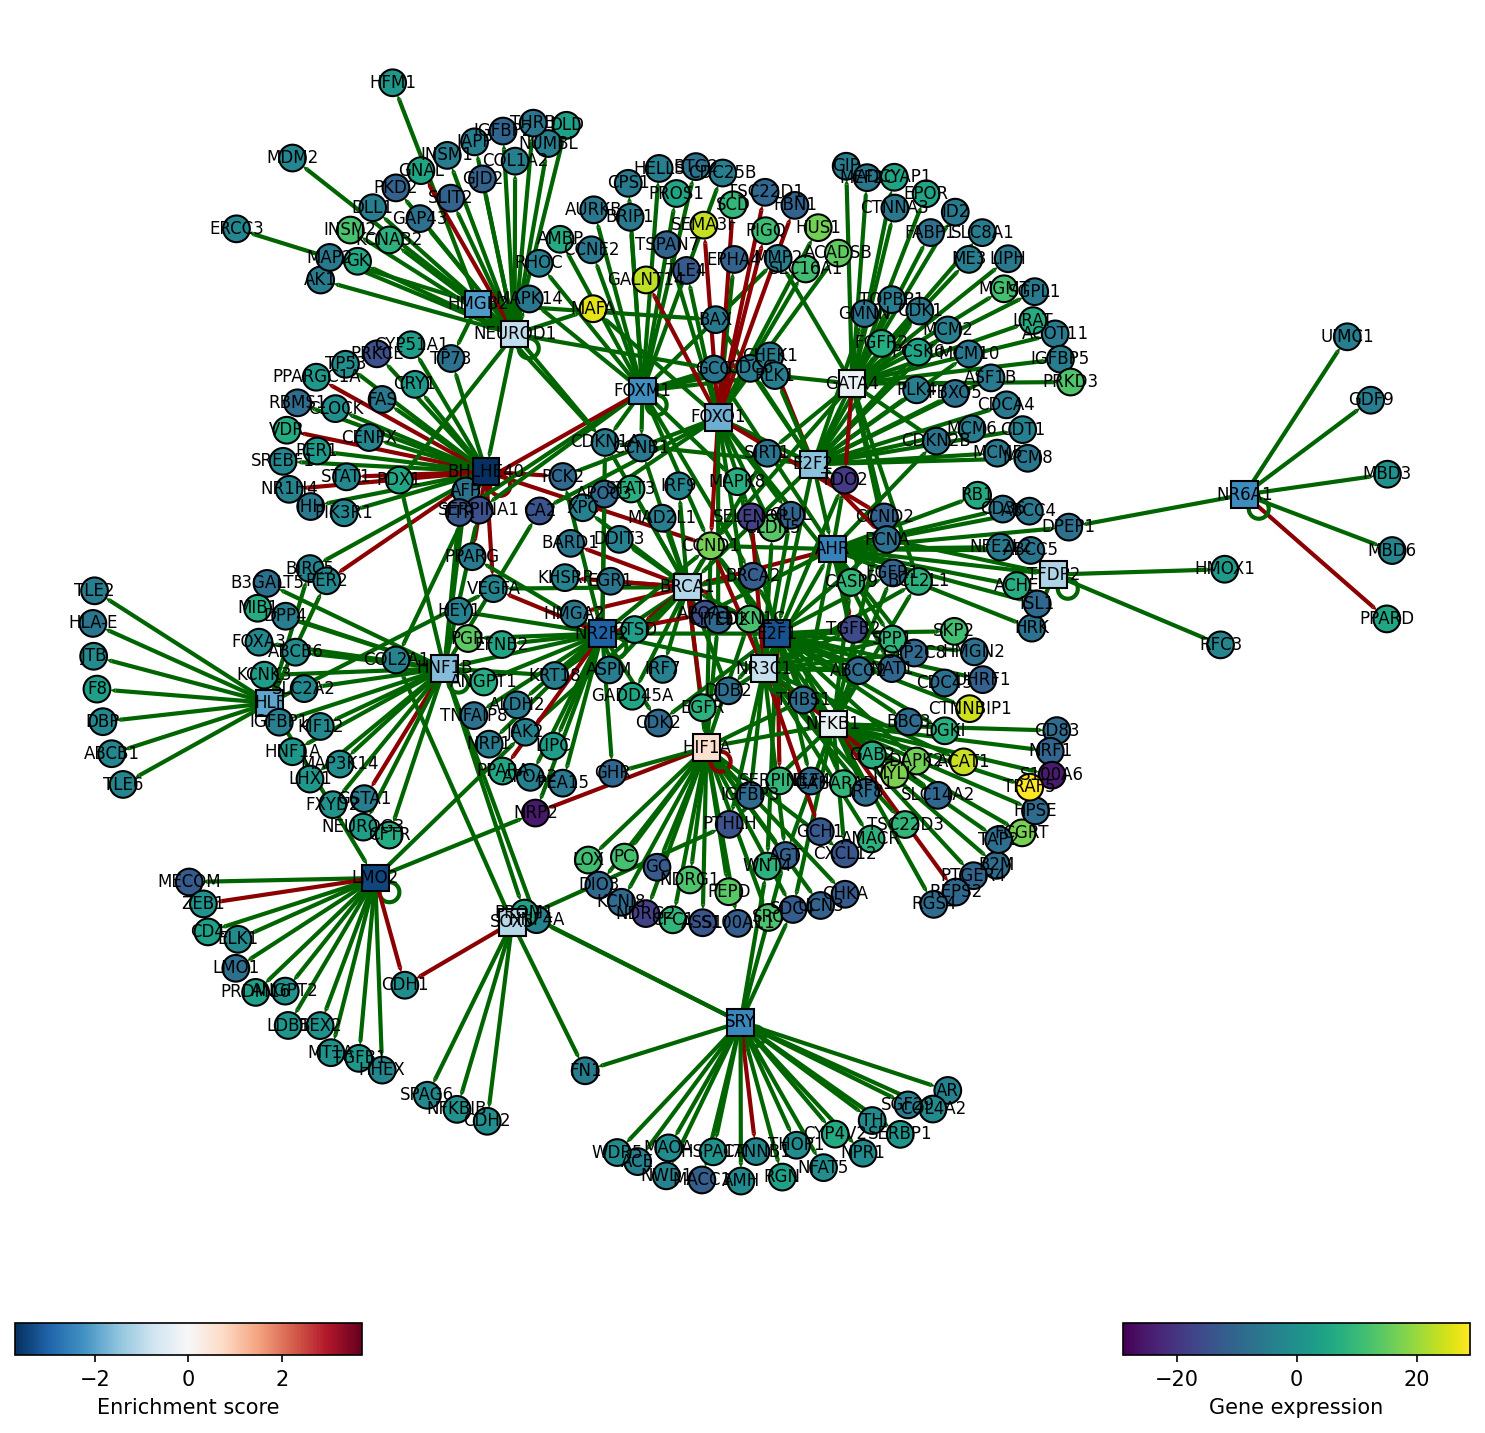

In [37]:
# MLM Network
#filter TFs by pos/neg
sources = merged_df.loc[:, ['Gene name', 'log2FoldChange']]
pos_tfs = sources[sources['log2FoldChange'] > 0]
neg_tfs = sources[sources['log2FoldChange'] < 0]
#print(pos_tfs)
#print(neg_tfs)
pos_tfs = list(x for x in pos_tfs["Gene name"])
neg_tfs = list(x for x in neg_tfs["Gene name"])

#Positive plot
tf_acts_MLM.index =["treatment.vs.control"]
if len(pos_tfs) > 0:
    dc.plot_network(
        net=collectri,
        obs=mat,
        act=tf_acts_MLM,
        n_sources=pos_tfs,
        n_targets=25,
        node_size=0.5,
        label_size=8,
        figsize=(10, 10),
        c_pos_w='darkgreen',
        c_neg_w='darkred',
        vcenter=True,
        save = f'../figures/{datasplit}/plot_networks_mlm_positive.png'
    )
# #Negative plot

tf_acts_MLM.index =["treatment.vs.control"]
if len(neg_tfs) > 0:
    dc.plot_network(
        net=collectri,
        obs=mat,
        act=tf_acts_MLM,
        n_sources=neg_tfs,
        n_targets=25,
        node_size=0.5,
        label_size=8,
        figsize=(10, 10),
        c_pos_w='darkgreen',
        c_neg_w='darkred',
        vcenter=True,
        save = f'../figures/{datasplit}/plot_networks_mlm_negative.png'
    )

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


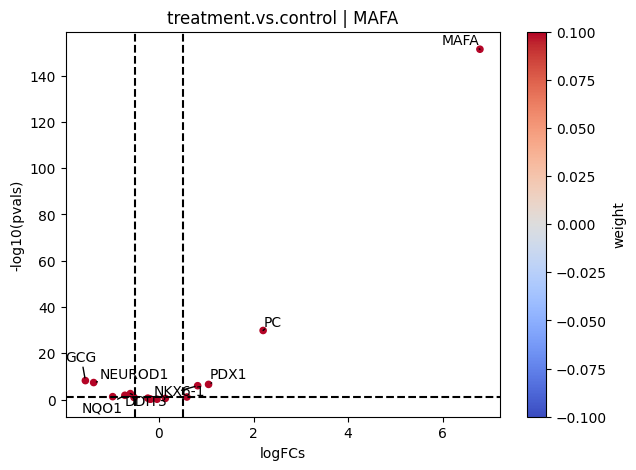

In [38]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway Activity Inference

In [39]:
# Retrieve PROGENy model weights
#progeny = dc.get_progeny(organism = "human", top=500)
progeny = pd.read_csv("progeny.csv")
progeny

,Unnamed: 0,source,target,weight,p_value
0,0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,1,Androgen,NKX3-1,10.622551,2.200000e-44
2,2,Androgen,MBOAT2,10.472733,4.600000e-44
3,3,Androgen,KLK2,10.176186,1.944410e-40
4,4,Androgen,SARG,11.386852,2.790210e-40
...,...,...,...,...,...
6995,6995,p53,ZMYM4,-2.325751,1.522388e-06
6996,6996,p53,CFDP1,-1.628168,1.526045e-06
6997,6997,p53,VPS37D,2.309503,1.537098e-06
6998,6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [40]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts.index=['Activity_score']
pathway_pvals.index=['pval']
pathway_all = pd.concat([pathway_acts, pathway_pvals])
pathway_all=pathway_all.T.sort_values(by="Activity_score",ascending=False)
pathway_all.to_csv(f'../figures/{datasplit}/top_pathways.csv')
pathway_all

Running mlm on mat with 1 samples and 15137 targets for 14 sources.


,Activity_score,pval
p53,2.320586,0.020322
Hypoxia,1.401430,0.161106
Androgen,0.323702,0.746168
PI3K,0.210583,0.833216
MAPK,-0.078581,0.937367
VEGF,-0.090811,0.927644
EGFR,-0.450096,0.652648
WNT,-0.507732,0.611649
Estrogen,-0.513545,0.607578
NFkB,-0.879646,0.379065


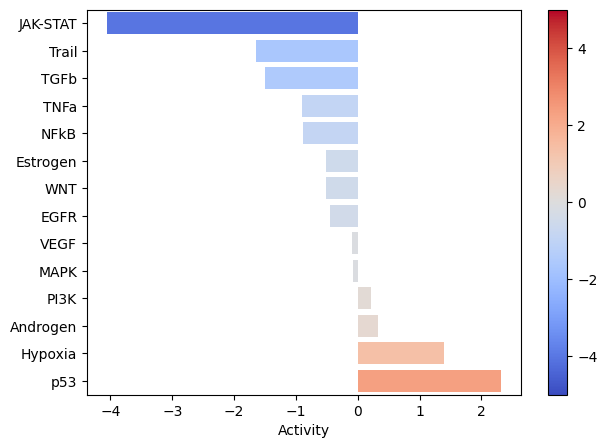

In [41]:
pathway_acts.index=['treatment.vs.control']
dc.plot_barplot(
    pathway_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=-5,
    vmax=5,
    save=f'../figures/{datasplit}/pathway_activities.png'
)

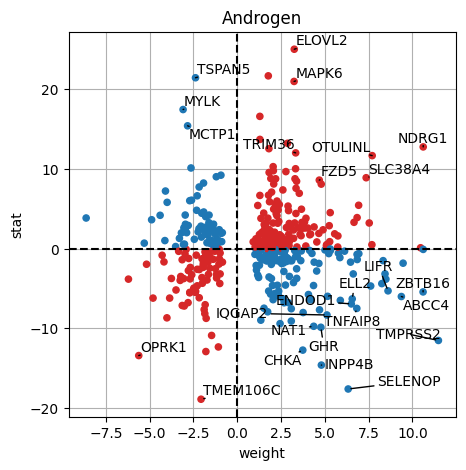

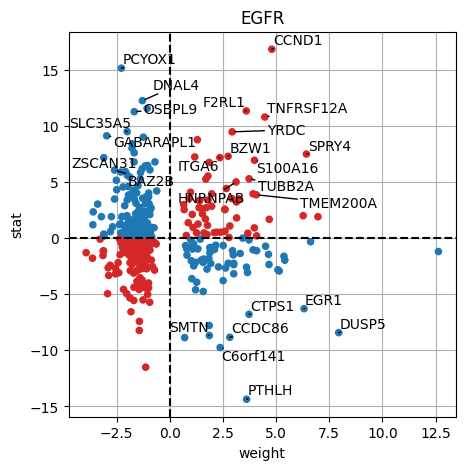

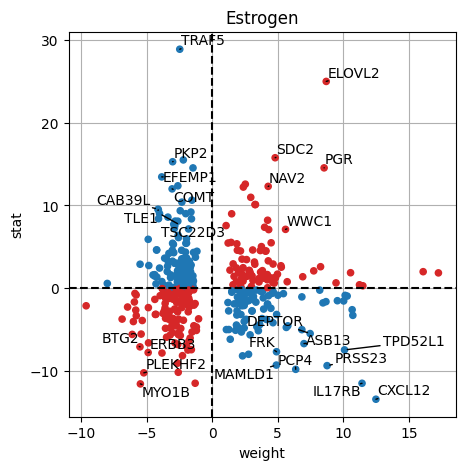

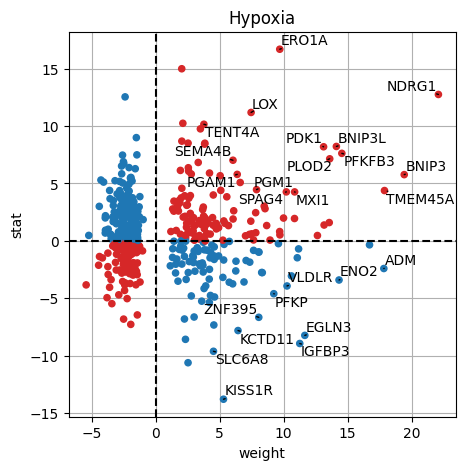

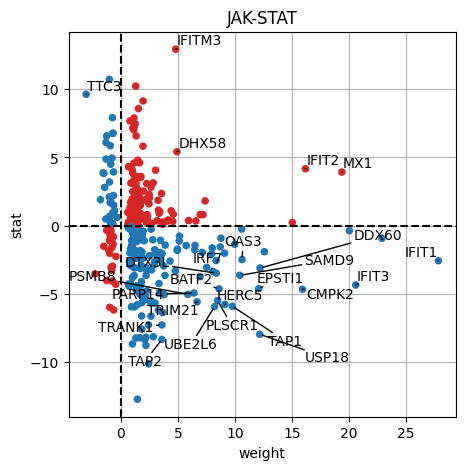

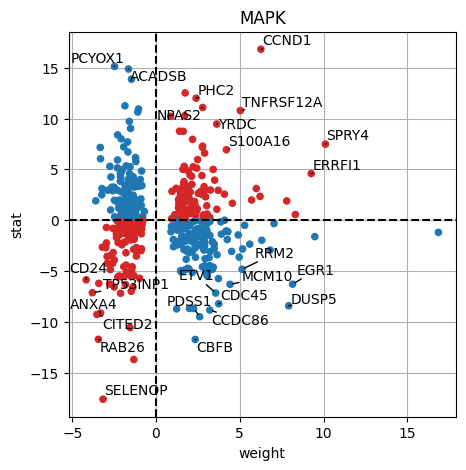

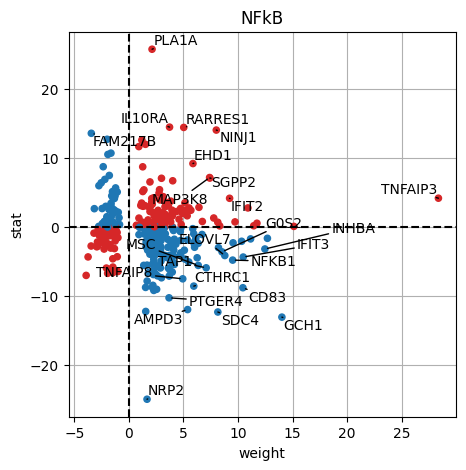

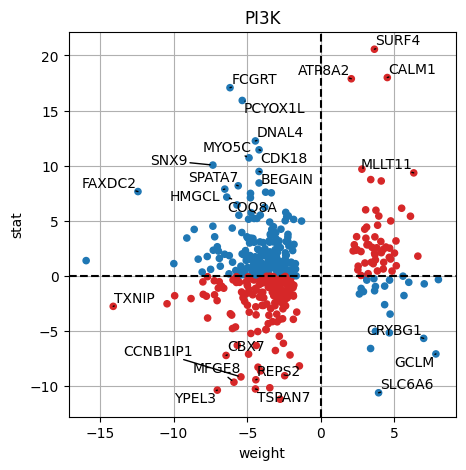

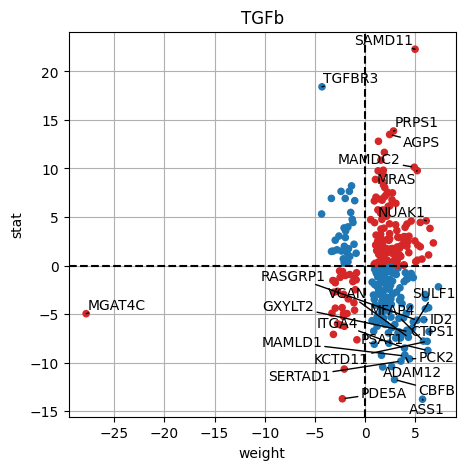

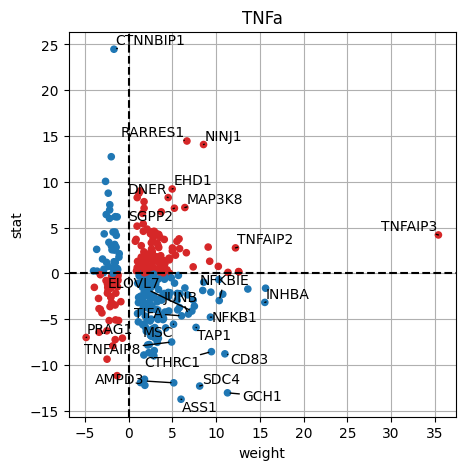

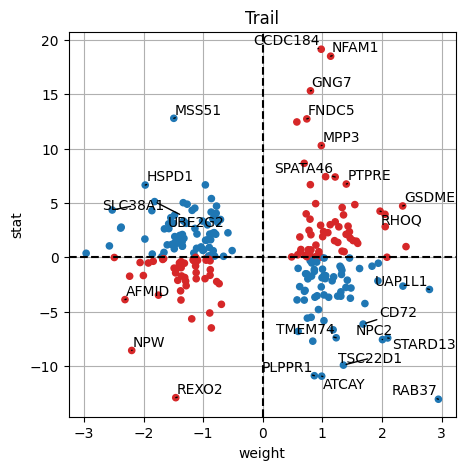

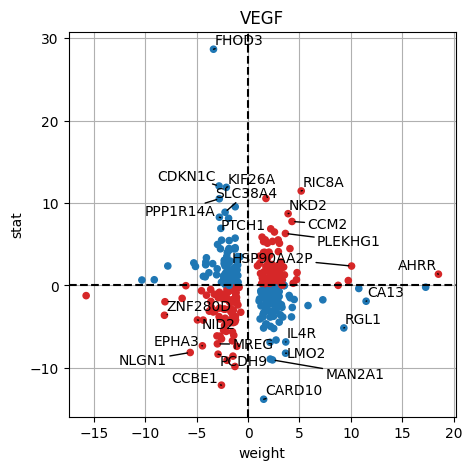

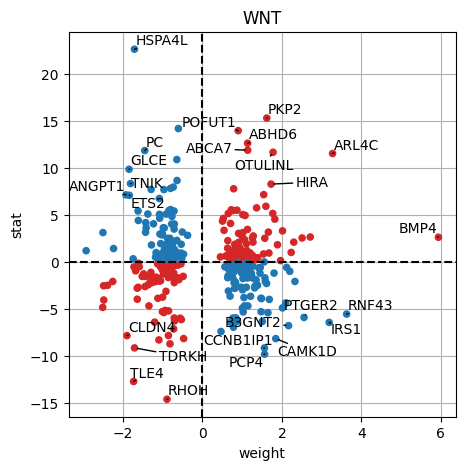

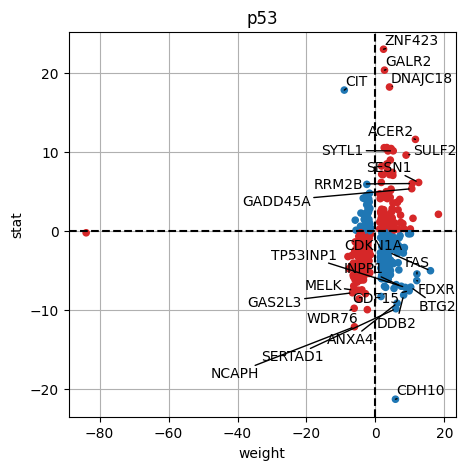

In [42]:
#Plot Targets for all pathways
for pathway in pathway_acts:
    dc.plot_targets(results_df, stat='stat', source_name=pathway, net=progeny, top=25, save=f'../figures/{datasplit}/{pathway}_targets.png')

### Funtional enrichment of Biological Terms

In [43]:
#kegg
# keggpc = pd.read_csv("KEGG.csv")
# keggpc
# dc.show_resources()

# ORA

In [44]:
# # Infer enrichment with ora using significant deg
# top_genes = results_df[results_df['padj'] < 0.05]

# # Run ora
# enr_pvals = dc.get_ora_df(
#     df=top_genes,
#     net=keggpc,
#     source='pathway',
#     target='genesymbol'
# )

# enr_pvals.head()

In [45]:
# dc.plot_dotplot(
#     enr_pvals.sort_values('Combined score', ascending=False).head(15),
#     x='Combined score',
#     y='Term',
#     s='Odds ratio',
#     c='FDR p-value',
#     scale=0.4,
#     figsize=(5, 10),
#     save=f'../figures/direct/{datasplit}/ORA.png'
# )

# Running Score

In [46]:
#choose accurate set_name
# dc.plot_running_score(
#     df=results_df,
#     stat='stat',
#     net=msigdb,
#     source='geneset',
#     target='genesymbol',
#     set_name='TNFA_SIGNALING_VIA_NFKB'
#     save=f'../figures/direct/{datasplit}/running_score.png'
# )